In [1]:
#Tools needed for the homework
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn import preprocessing
from scipy.io import wavfile
from bs4 import BeautifulSoup
import requests
from collections import Counter

In [2]:
#Exercise 1
img1 = mpimg.imread("./bird.png")
img2 = mpimg.imread("./blink.png")
img3 = mpimg.imread("./cyberpunk.png")
img4 = mpimg.imread("./omnicat.png")
img5 = mpimg.imread("./sky.png")

images = [img1, img2, img3, img4, img5]

In [3]:
def plot_color_histogram(img):
    #Create a figure with 3 subplots in a row, also set the width of the figure so the subplots don't overlap
    fig, (red_plot, green_plot, blue_plot) = plt.subplots(ncols=3, figsize=(20, 5))
    #Create some tuples to make indexing easier
    colors = ("Red", "Green", "Blue")
    channel_ids = (0, 1, 2)
    plots = (red_plot, green_plot, blue_plot)

    #We only add one title on each axis to avoid unnecessary text on our plot
    green_plot.set_xlabel("Color Value")
    red_plot.set_ylabel("Pixel Count")

    #Loop over colors, channel_ids, plots at the same time with the zip function to make acessing elements easy
    for channel_id, color, plot in zip(channel_ids, colors, plots):
        #imread returns an array with 256 rows that each contain 256 pixels with 3 values (Red, Green, Blue)
        #imread returns an array with values between 0 and 1 so we set the range our values can take on to between 0 and 1
        # and set 256 bins for the 256 values each channel can take on
        histogram, bin_edges = np.histogram(img[:, :, channel_id], bins=256, range=(0, 1))
        
        #plots the histogram with the acording title and color
        plot.plot(histogram, color=color)
        plot.set_title("{0} Channel Histogram".format(color))
        plot.plot()
    
    plt.show()

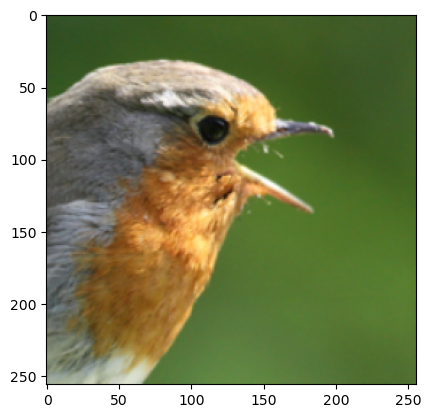

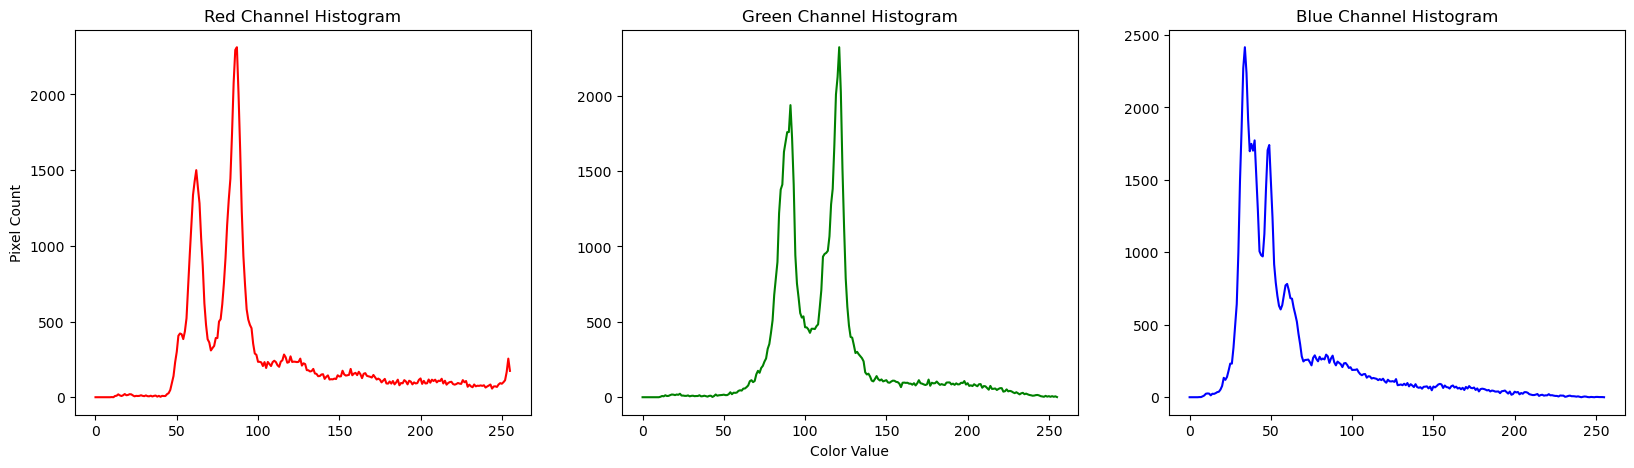

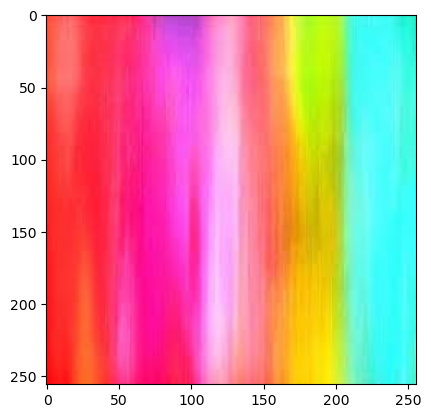

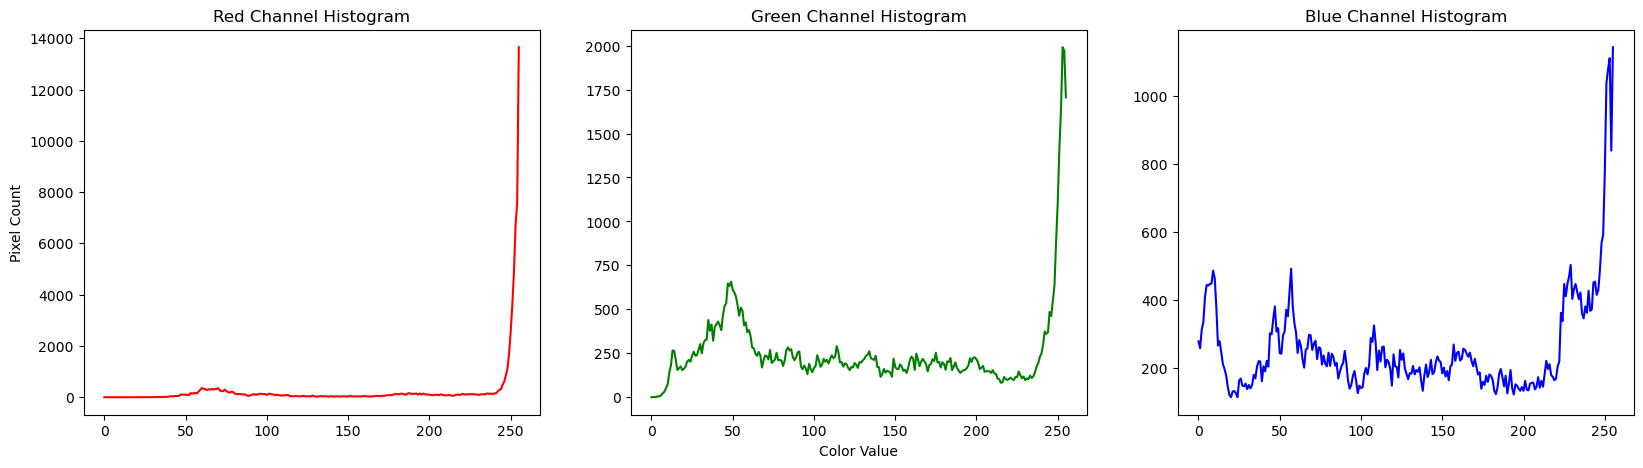

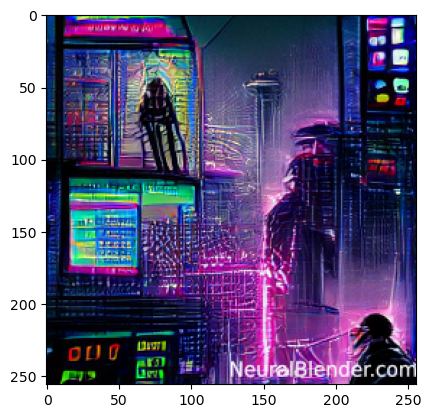

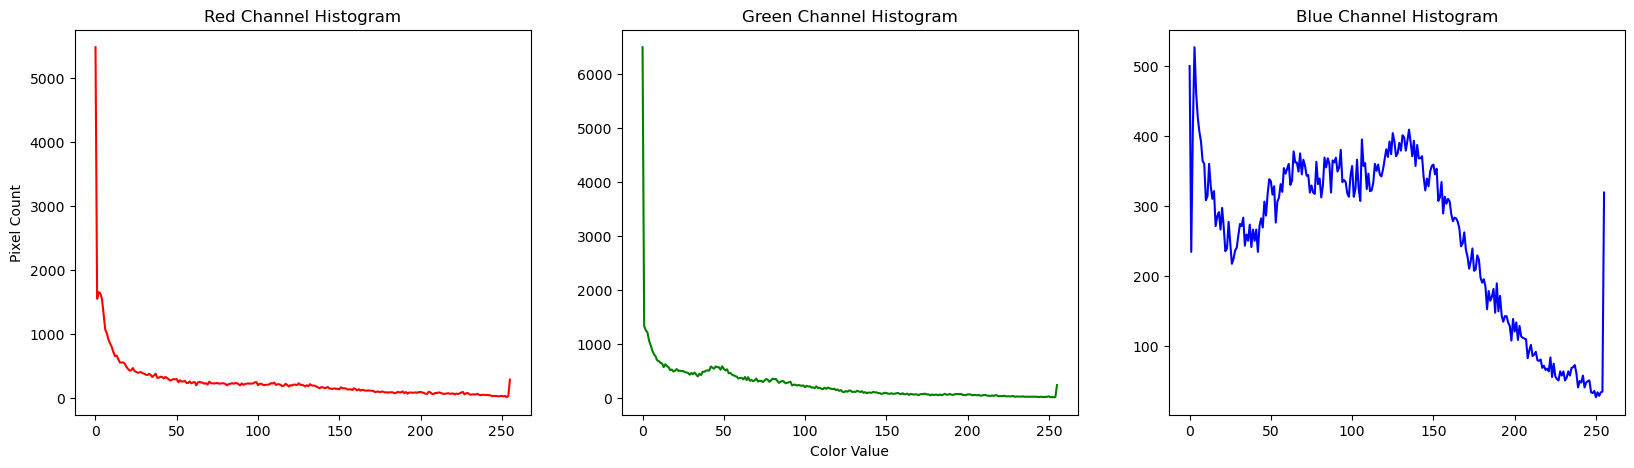

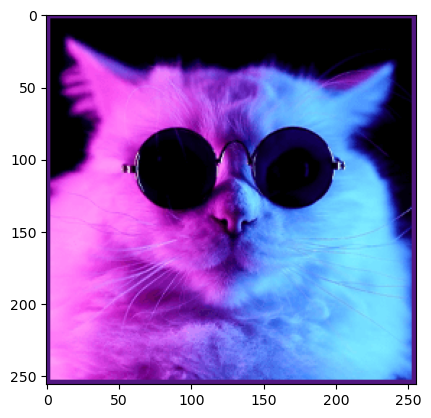

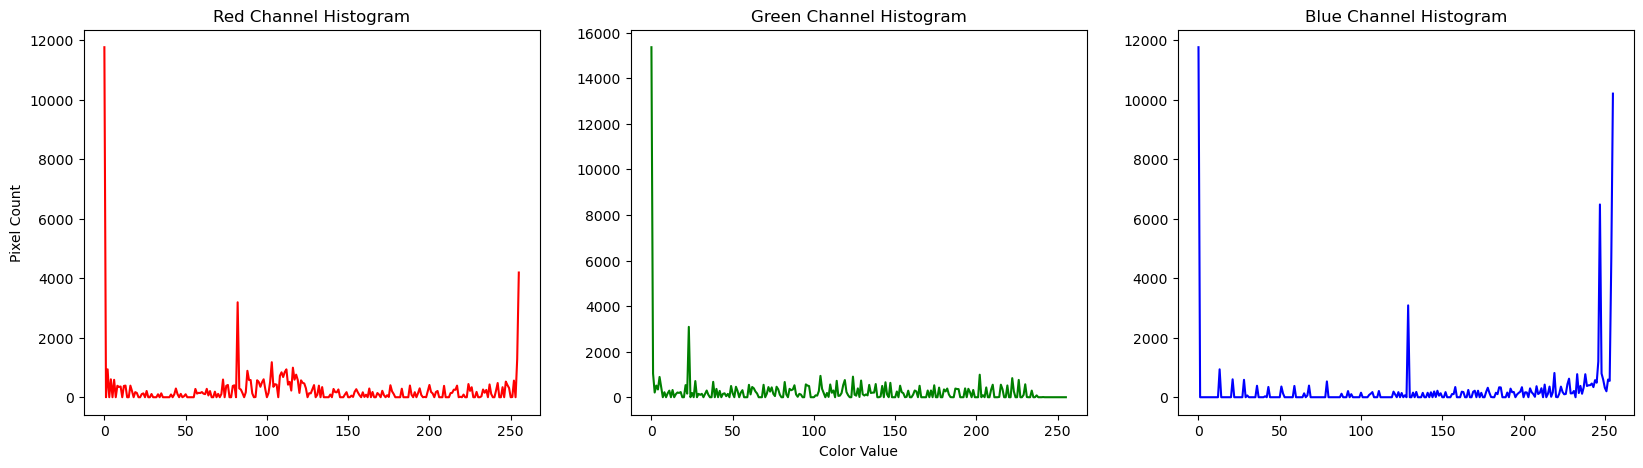

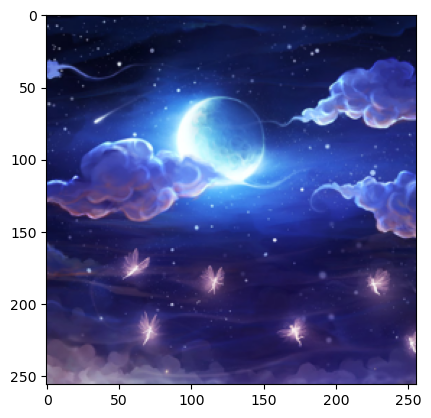

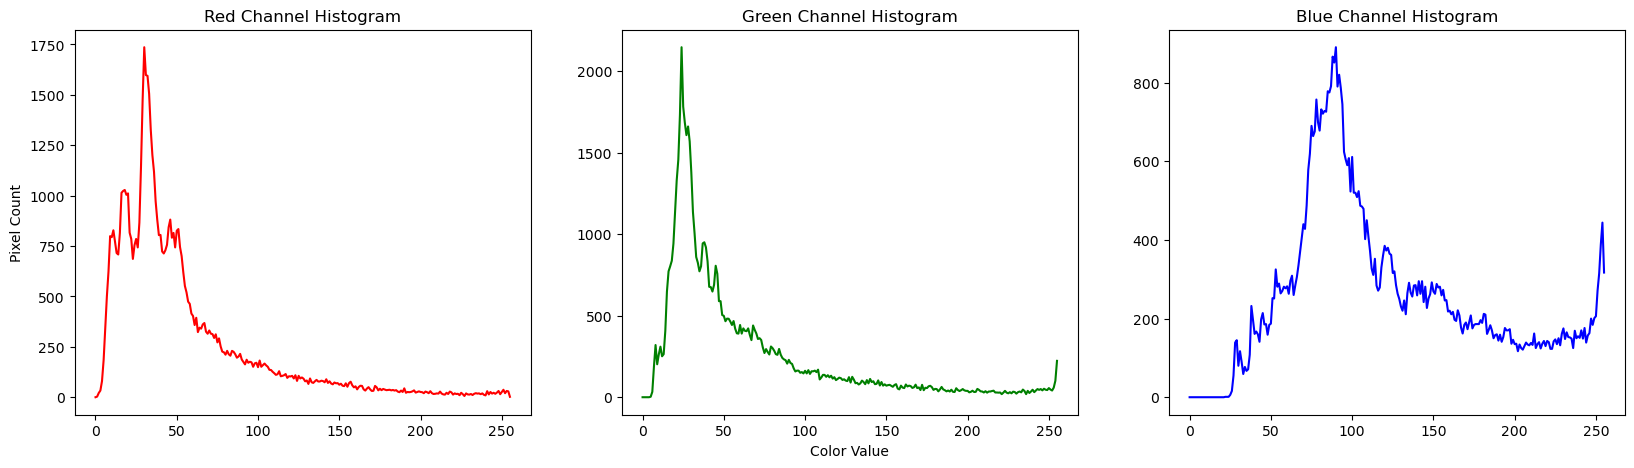

In [4]:
#Shows the 5 images and their color histograms separately by channel
for image in images:
    plt.imshow(image)
    plot_color_histogram(image)

In [5]:
#Exercise 2
def standardize_channels(img):
    #Create the separate channels, means, and standard deviations
    channels = [img[:, :, i] for i in range(3)]
    means = [np.mean(channel) for channel in channels]
    devs = [np.std(channel) for channel in channels]
    
    print("Means before scaling")
    print(f"R|G|B: {means[0]}|{means[1]}|{means[2]}")
    print("Standard deviation before scaling")
    print(f"R|G|b: {devs[0]}|{devs[1]}|{devs[2]}")
    print()

    #Scaling manually
    #for channel, mean, dev in zip(channels, means, devs):
    #    scaled += (channel - mean) / dev
        
        
    #Scaling using the StandardScaler class
    #Instantiate the StandardScaler class
    scaler = preprocessing.StandardScaler()
    
    #Fit the scaler to the channel values, then transform it
    #Fitting the scaler means calculating the mean and standard deviation
    #Transforming means performing the steps shown in the manual scaling comment
    scaled = [scaler.fit_transform(channel) for channel in channels]
    
    #Mean is near zero instead of zero as a result of float imprecision
    print("Means after scaling")
    print(f"R|G|B: {np.mean(scaled[0])}|{np.mean(scaled[1])}|{np.mean(scaled[2])}")
    print("Standard deviation after scaling")
    print(f"R|G|B: {np.std(scaled[0])}|{np.std(scaled[1])}|{np.std(scaled[2])}")
    print("-------------------")
    

In [6]:
for image in images:
    standardize_channels(image)

Means before scaling
R|G|B: 0.4074985384941101|0.4417839050292969|0.24264609813690186
Standard deviation before scaling
R|G|b: 0.1957315355539322|0.12653154134750366|0.15040533244609833

Means after scaling
R|G|B: -3.725290298461914e-09|7.450580596923828e-09|1.4901161193847656e-08
Standard deviation after scaling
R|G|B: 1.0|1.0|1.0
-------------------
Means before scaling
R|G|B: 0.8347688913345337|0.5400975942611694|0.5434199571609497
Standard deviation before scaling
R|G|b: 0.26900196075439453|0.3230721652507782|0.32619014382362366

Means after scaling
R|G|B: 0.0|7.450580596923828e-09|7.450580596923828e-09
Standard deviation after scaling
R|G|B: 1.0|1.0|1.0
-------------------
Means before scaling
R|G|B: 0.2658688724040985|0.22402578592300415|0.40077006816864014
Standard deviation before scaling
R|G|b: 0.2642962634563446|0.22043776512145996|0.23926356434822083

Means after scaling
R|G|B: 0.0|-3.725290298461914e-09|5.587935447692871e-09
Standard deviation after scaling
R|G|B: 0.9999999

In [7]:
#Exercise 3
def plot_spectrogram(wav_path):
    #wavfile.read() reads the given file at the path and returns its sampling rate and the data
    #Sampling rate is needed for the spectrogram function
    #May give a warning that can safely be ignored
    sampling_rate, data = wavfile.read(wav_path)
    
    #Create 2 subplots
    plt.subplots(nrows=2)
    #To the plot with 2 rows and 1 column add the first subplot
    plt.subplot(211)
    #Some formatting and labels
    plt.title(wav_path.split('/')[-1] + " spectrogram")
    plt.ylabel("Amplitude")
    #plt.plot plots the "image" of the soundfile
    plt.plot(data)
    
    #To the plot with 2 rows and 1 column add the second subplot
    plt.subplot(212)
    #Some formatting and labels
    plt.xlabel("Time")
    plt.ylabel("Fequency")
    #plt.specgram provided with the sampling rate and data of an audio file creates and shows a spectrogram
    #and also returns various arrays used to make the plot as well as the image itself
    spectrum, freqs, t, im = plt.specgram(data, Fs=sampling_rate)
    
    return data

C:\Users\levi2\AppData\Local\Temp\ipykernel_11736\1743556476.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read(wav_path)


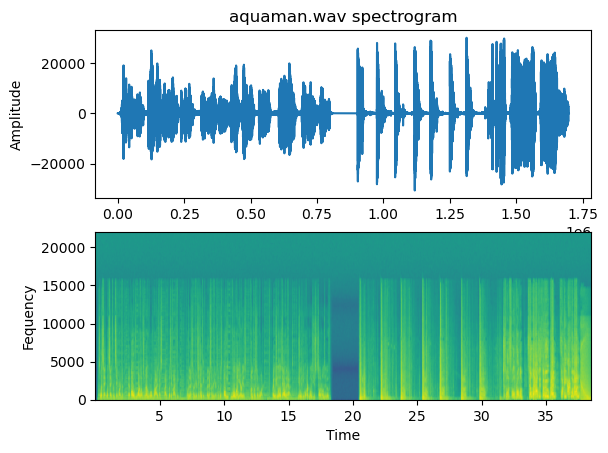

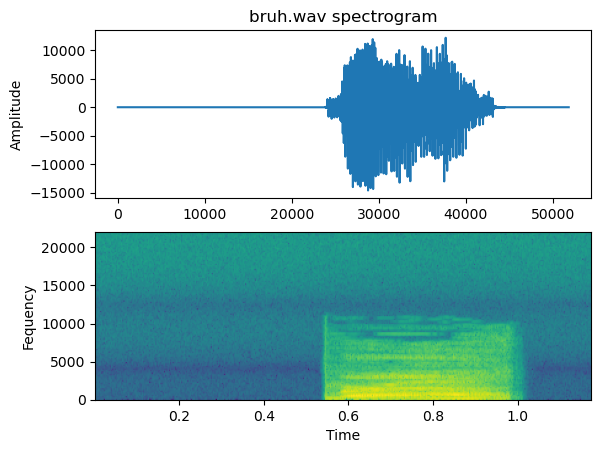

In [8]:
aquaman_data = plot_spectrogram("./aquaman.wav")
bruh_data = plot_spectrogram("./bruh.wav")

In [9]:
#Exercise 4
print("Before scaling")
print(f"Aquaman: Mean - {np.mean(aquaman_data)} | Standard Deviation - {np.std(aquaman_data)}")
print(f"Bruh: Mean - {np.mean(bruh_data)} | Standard Deviation - {np.std(bruh_data)}")

#We use the same method for standardization as in exercise 2
#Note that inaccuracies still occure as a result of working with floats
aquaman_scaled = preprocessing.StandardScaler().fit_transform(aquaman_data.reshape(-1, 1))
bruh_scaled = preprocessing.StandardScaler().fit_transform(bruh_data.reshape(-1, 1))

print("After scaling")
print(f"Aquaman: Mean - {np.mean(aquaman_scaled)} | Standard Deviation - {np.std(aquaman_scaled)}")
print(f"Bruh: Mean - {np.mean(bruh_scaled)} | Standard Deviation - {np.std(bruh_scaled)}")

Before scaling
Aquaman: Mean - 15.970895728098613 | Standard Deviation - 4019.0363819612103
Bruh: Mean - 1.079224537037037 | Standard Deviation - 2306.2931487466476
After scaling
Aquaman: Mean - -7.114668055875928e-19 | Standard Deviation - 0.9999999999999999
Bruh: Mean - -2.3129646346357427e-18 | Standard Deviation - 0.9999999999999998


In [10]:
#Exercise 5
#Store requested page in separate cell not to spam website with each run
page = requests.get("http://smartlab.tmit.bme.hu/oktatas-deep-learning")

<BarContainer object of 35 artists>

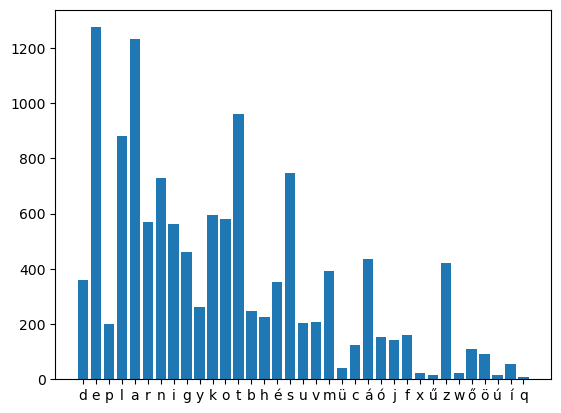

In [11]:
#BeautifulSoup parses the HTTP response of requests.get() to HTML
soup = BeautifulSoup(page.content, "html.parser")
#Get only the text from the webpage (not from tags etc.)
#Then make it lower case so as not to distinguish capitalized characters
#Could also changed accented charcters to their non-accented pairs
text = soup.get_text().lower()
#Counter object is like an automatic dictionary that makes key:value pairs from text
counter = Counter(text)
removable = []

#Filter for characters of the alphabet
for key in counter.keys():
    if not key.isalpha():
        removable += key
#Remove unnecessary characters
for item in removable:
    del counter[item]

plt.bar(counter.keys(), counter.values())